<a href="https://colab.research.google.com/github/chaos44/food_recognition/blob/master/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)#2. Get the file
d10 = drive.CreateFile({'id':'1jqXr5d-UAhOUaPIb-g7p_8xEW9XxHjUr'}) # replace the id with id of file you want to access
d20 = drive.CreateFile({'id':'1hbZ19igWGti65MXOeGOwuzbSzVAOLdlH'})
d30 = drive.CreateFile({'id':'12uU6ocY9r6BfBk8fo4BQC8BVXjDDhCBb'})
d40 = drive.CreateFile({'id':'1Hs5OVtYD8xDvLd7y6drDHUu4ErXjBvr_'})
d50 = drive.CreateFile({'id':'19FaeD7fdFlqu0U8K2DIJevtp1tb4PbBe'})
d10.GetContentFile('d10.zip')
d20.GetContentFile('d20.zip')
d30.GetContentFile('d30.zip')
d40.GetContentFile('d40.zip')
d50.GetContentFile('d50.zip')

In [3]:
!unzip d10.zip -d food
!unzip d20.zip -d food
!unzip d30.zip -d food
!unzip d40.zip -d food
!unzip d50.zip -d food

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: food/soba/2129.jpg      
  inflating: food/soba/2130.jpg      
  inflating: food/soba/2131.jpg      
  inflating: food/soba/2132.jpg      
  inflating: food/soba/2133.jpg      
  inflating: food/soba/2134.jpg      
  inflating: food/soba/2135.jpg      
  inflating: food/soba/2136.jpg      
  inflating: food/soba/2137.jpg      
  inflating: food/soba/2138.jpg      
  inflating: food/soba/2139.jpg      
  inflating: food/soba/2140.jpg      
  inflating: food/soba/2141.jpg      
  inflating: food/soba/2142.jpg      
  inflating: food/soba/2143.jpg      
  inflating: food/soba/2144.jpg      
  inflating: food/soba/2145.jpg      
  inflating: food/soba/2146.jpg      
  inflating: food/soba/2147.jpg      
  inflating: food/soba/2148.jpg      
  inflating: food/soba/2149.jpg      
  inflating: food/soba/2150.jpg      
  inflating: food/soba/2151.jpg      
  inflating: food/soba/2152.jpg      
  inflating: food/soba/2153.jpg      
  inflating: food/

In [1]:
from PIL import Image
import os, glob
import numpy as np
from sklearn import model_selection
# from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 中心から任意のサイズをトリミング
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [3]:
# パラメータの初期化
classes = ['beefdon', 'curry', 'fish', 'humberger', 'katsudon', 'ramen', 'seafooddon', 'soba', 'spaghetti', 'tempuradon'
         , 'udon', 'lasagna', 'hamburger_steak', 'nikujaga', 'fried_rice', 'omelette', 'sukiyaki', 'sushi', 'gyoza', 'fried_chicken'
         , 'okonomiyaki', 'croquette', 'pancake', 'french_toast', 'tart', 'taco_rice', 'doria', 'takoyaki', 'tapioca', 'yakisoba'
         , 'ginger_pork', 'steak', 'roast_meat', 'bread', 'yakitori', 'rice_ball', 'goya_chanpuru', 'instant_noodle', 'meat_bun', 'gratin'
         , 'mabo_tofu', 'tiramisu', 'cream_puff', 'eclair', 'hot_dog', 'potato_salad', 'stew', 'pizza', 'french_fry', 'avocado_salad']
num_classes = len(classes)
image_size = 150

In [4]:
# 画像の読み込みとnumpy配列への変換
X = [] # リスト
Y = [] # リスト

In [5]:
# アスペクト比を固定して、幅が指定した値になるようリサイズする。
def scale_to_width(img, width):
    height = round(img.height * width / img.width)
    return img.resize((width, height))

In [6]:
for index, classlabel in enumerate(classes):
    photos_dir = './food/' + classlabel  
    files = glob.glob(photos_dir + '/*.jpg')
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert('RGB')
        # image = image.convert('RGB')の前にトリミングするとメモリオーバー、理由不明
        image = crop_center(image, 800, 800) # resizeする時にアスペクト比を固定させるため、800*800の部分をトリミング
        image = image.resize((image_size, image_size))
        data = np.asarray(image, dtype=np.float32) / 255.0  # 正規化 # dtype=np.float32でサイズ縮小、MemoryError解消のため # 2020/7/7
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


In [7]:
print(X.nbytes)
print(Y.nbytes)

4567860000
135344


In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y)
# X_train, X_test = model_selection.train_test_split(X)
print(X_train.nbytes)
print(X_test.nbytes)

3425760000
1142100000


In [9]:
# メモリ解放
X = []
# y_train, y_test = model_selection.train_test_split(Y)
# メモリ解放
y = []

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
#　モデルの定義
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# opt = SGD(lr=0.01)
opt = Adam()

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=100)

score = model.evaluate(X_test, y_test, batch_size=32)

print(score)
model.save('./food_recognition_cnn_50.h5')

In [12]:
model.save('./food_recognition_cnn_50.h5')

In [16]:
result = model.predict(X_train)[0]

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def process(data):
    plt.figure()
    plt.imshow(image)

beefdon 100

beefdon 99

curry 99

udon 49

fish 100

stew 95

humberger 100

humberger 99

ramen 100

ramen 99

bread 47

seafooddon 99

soba 100

soba 100

mabo_tofu 55

spaghetti 41

tempuradon 99

tempuradon 100

udon 99

udon 100



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


lasagna 99

spaghetti 20

hamburger_steak 100

hamburger_steak 100

nikujaga 99

nikujaga 100

fried_rice 100

fried_rice 100

omelette 99

omelette 100

sukiyaki 99

sukiyaki 100

steak 31

sushi 100

gyoza 99

goya_chanpuru 45

fried_chicken 100

steak 95

okonomiyaki 100

okonomiyaki 100

croquette 100

croquette 99

pancake 99

pancake 100

french_toast 99

french_toast 100

tart 99

tart 100

taco_rice 100

taco_rice 99

doria 100

gratin 98

takoyaki 100

takoyaki 100

tapioca 100

tapioca 100

yakisoba 100

yakisoba 99

yakisoba 60

ginger_pork 100

steak 99

steak 100

roast_meat 99

roast_meat 100

bread 99

croquette 64

yakitori 100

yakitori 100

rice_ball 100

rice_ball 100

goya_chanpuru 100

goya_chanpuru 100

instant_noodle 100

instant_noodle 100

meat_bun 100

udon 37

gratin 99

gratin 99

mabo_tofu 100

mabo_tofu 100

tiramisu 98

tiramisu 100

cream_puff 100

cream_puff 100

eclair 92

eclair 100

hot_dog 100

seafooddon 83

potato_salad 99

potato_salad 100

stew 

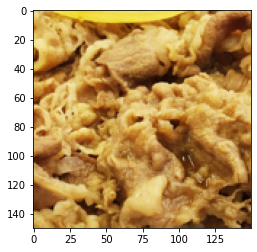

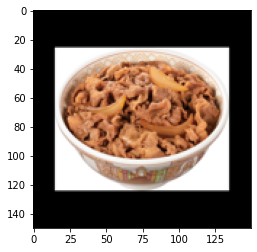

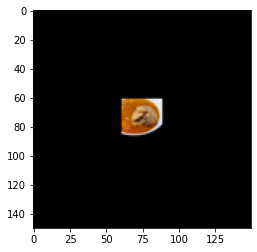

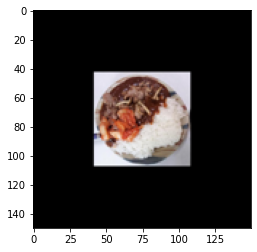

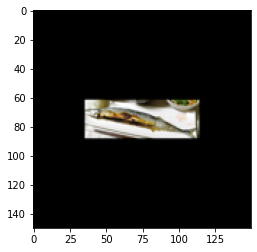

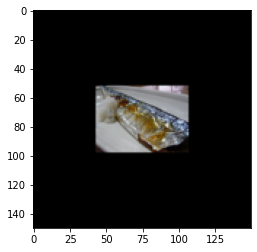

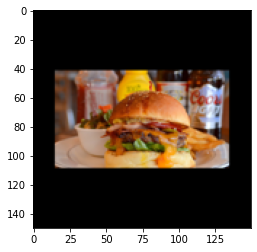

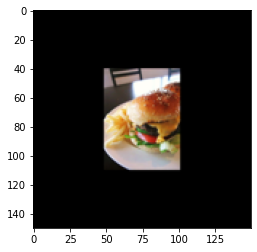

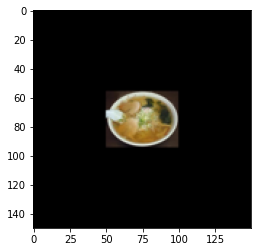

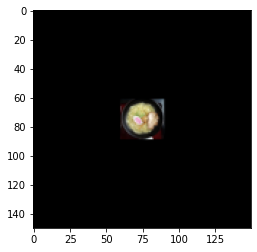

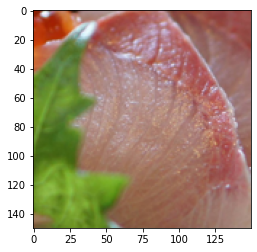

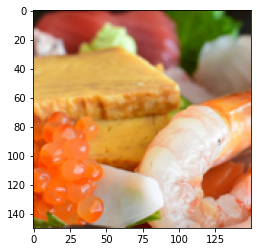

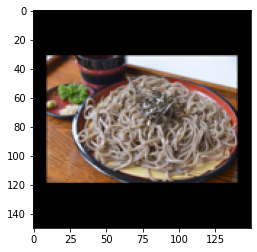

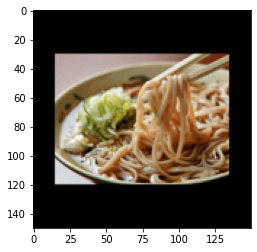

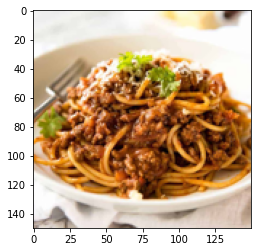

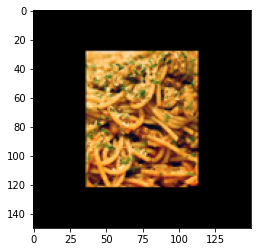

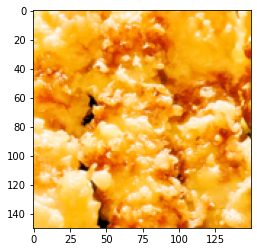

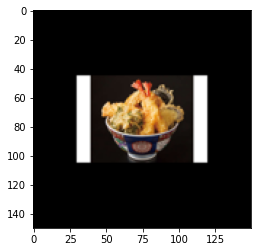

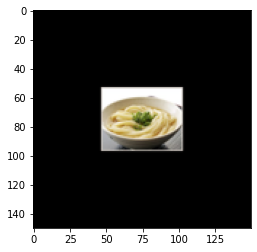

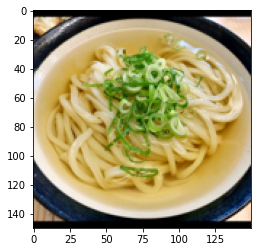

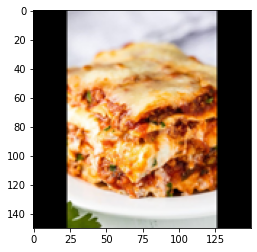

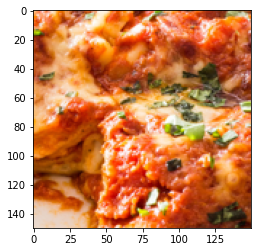

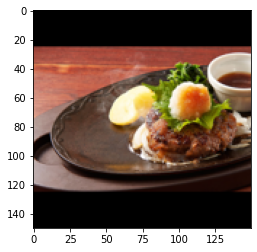

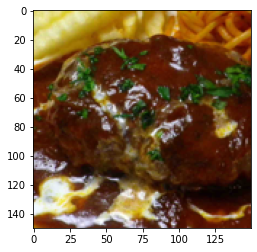

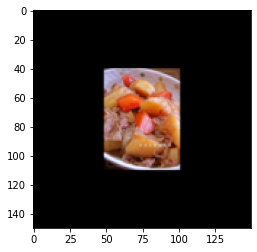

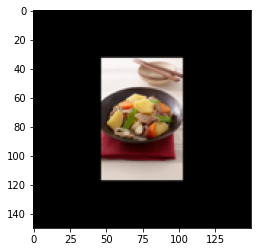

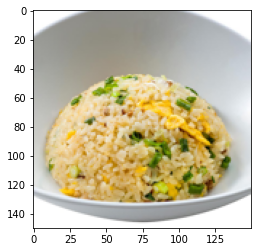

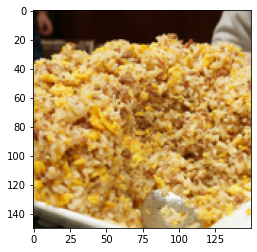

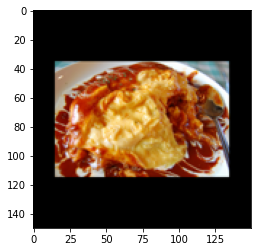

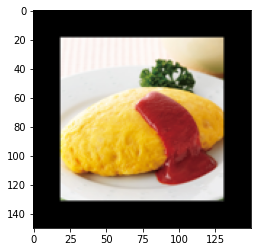

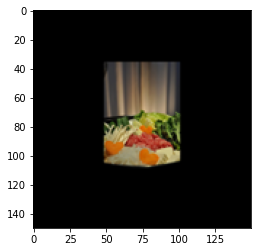

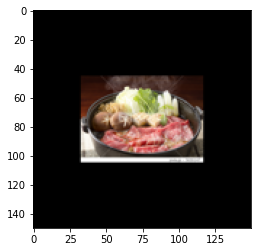

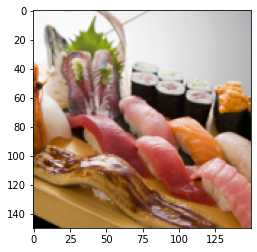

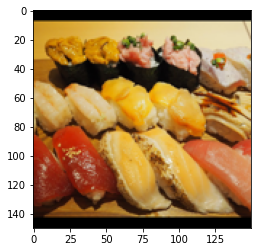

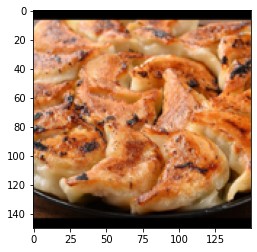

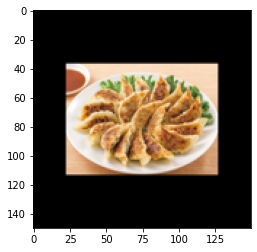

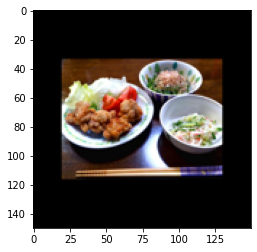

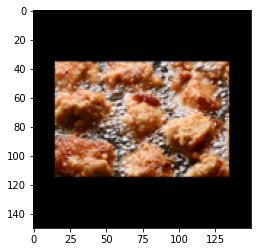

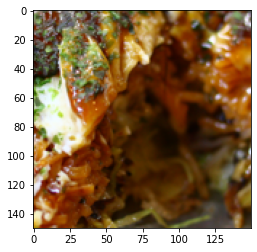

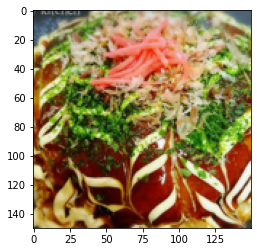

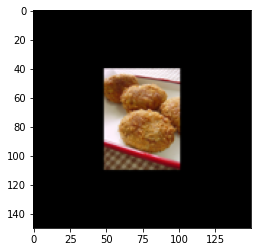

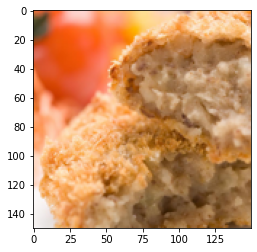

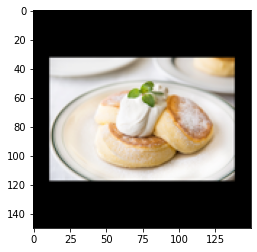

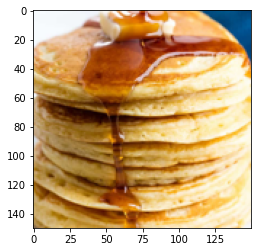

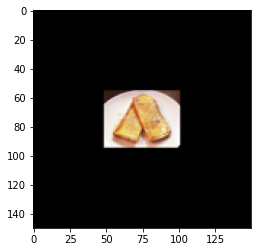

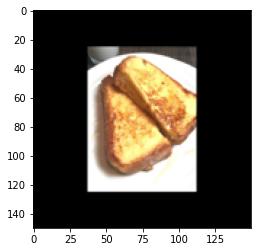

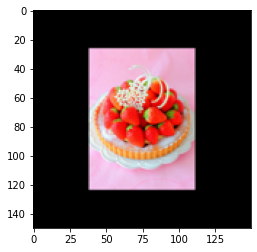

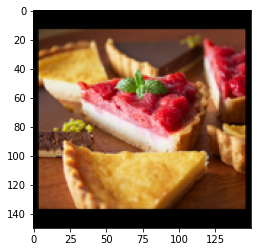

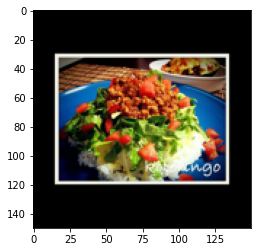

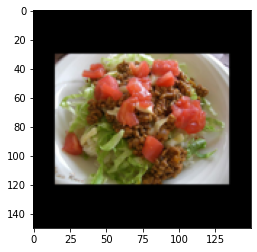

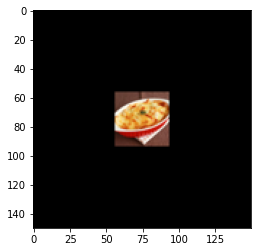

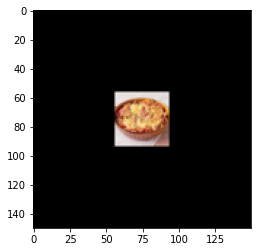

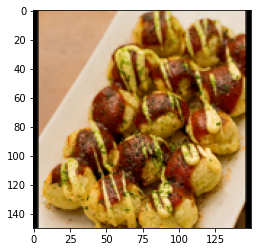

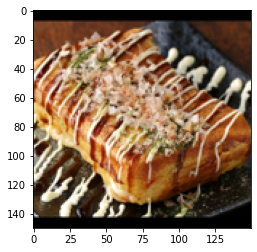

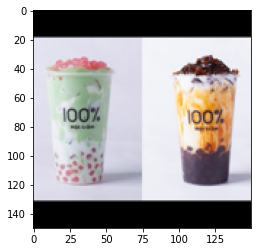

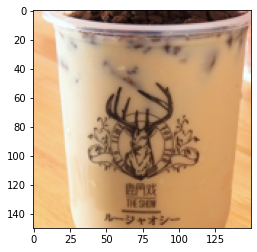

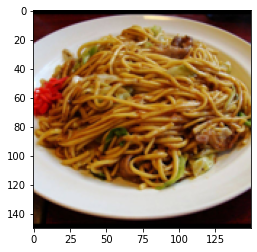

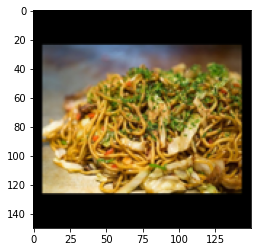

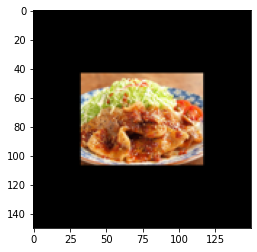

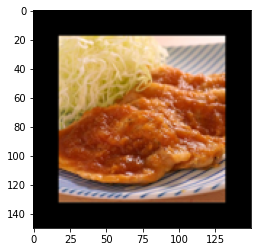

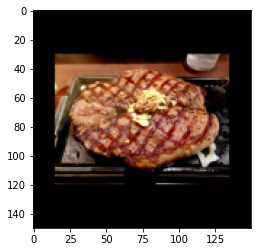

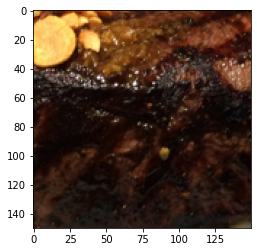

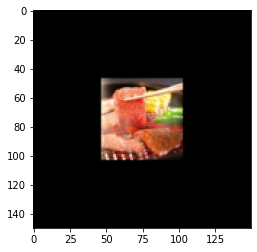

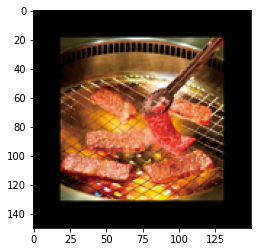

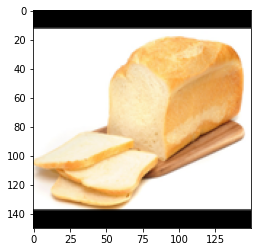

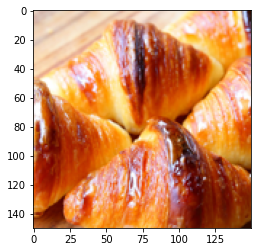

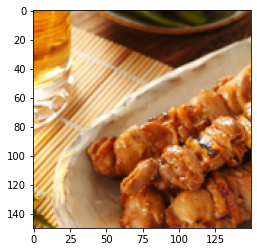

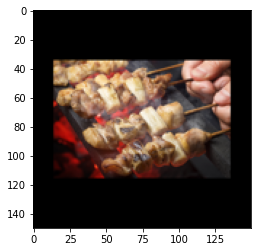

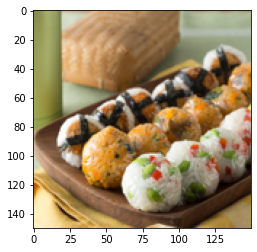

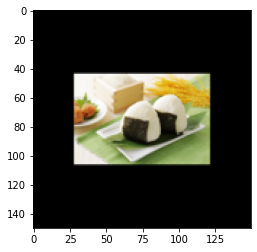

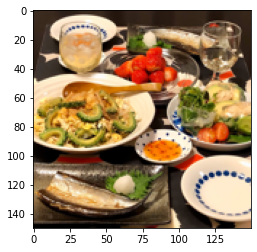

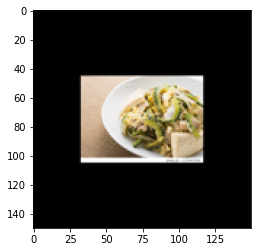

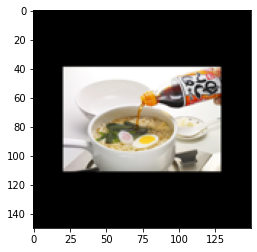

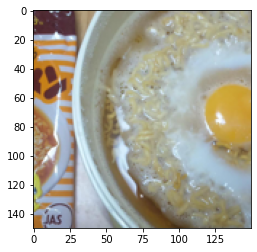

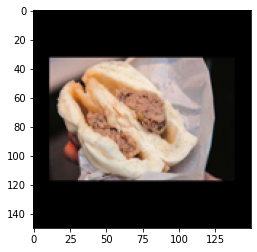

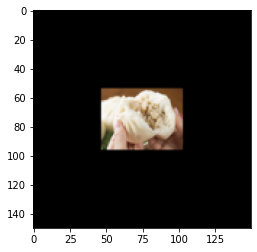

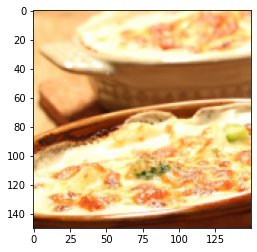

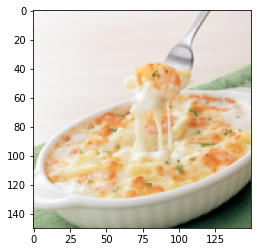

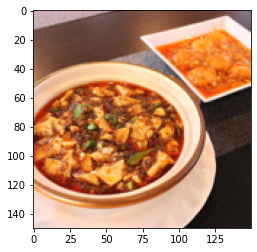

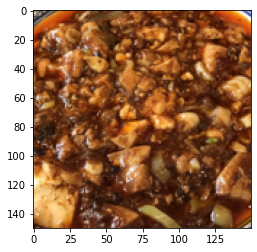

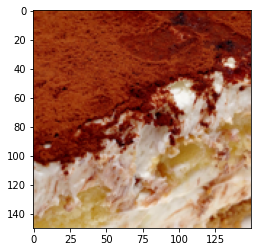

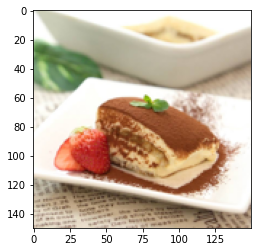

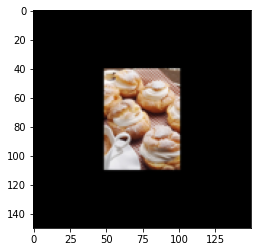

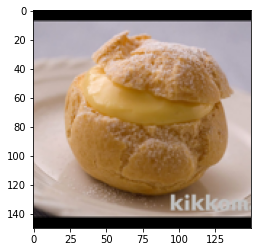

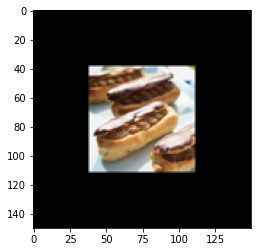

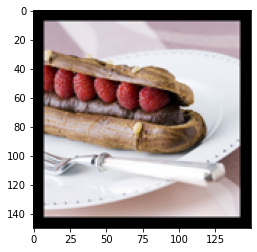

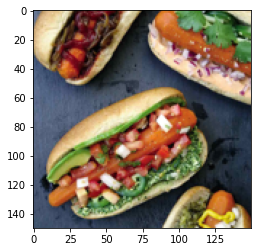

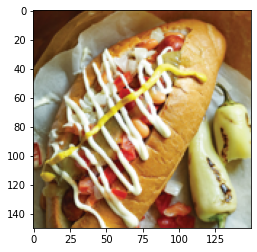

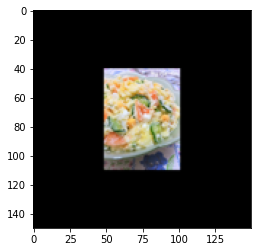

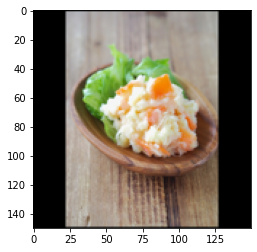

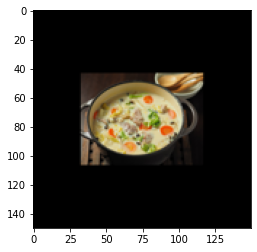

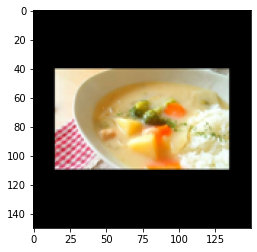

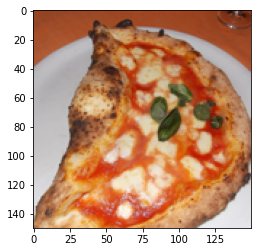

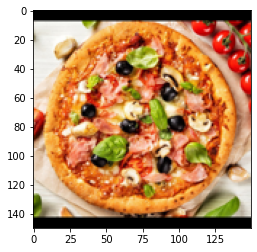

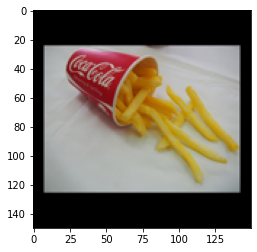

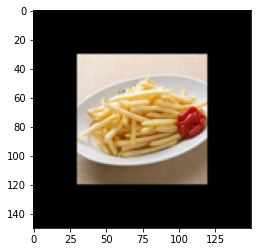

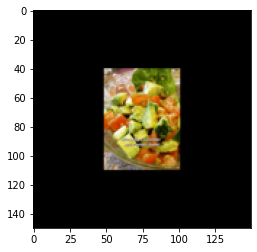

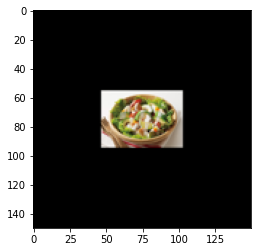

In [41]:
for index, classlabel in enumerate(classes):
    photos_dir = './food/' + classlabel  
    files = glob.glob(photos_dir + '/*.jpg')
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert('RGB')
        # image = image.convert('RGB')の前にトリミングするとメモリオーバー、理由不明
        image = crop_center(image, 800, 800) # resizeする時にアスペクト比を固定させるため、800*800の部分をトリミング
        image = image.resize((image_size, image_size))
        data = np.asarray(image, dtype=np.float32) / 255.0  # 正規化 # dtype=np.float32でサイズ縮小、MemoryError解消のため # 2020/7/7
        data = np.array(data)
        process(data)
        X = []
        # 最後尾に追加する
        X.append(data)
        X = np.array(X)
        result = model.predict([X])[0]
        # 値の大きい方の番号(配列の添字)を返す
        predicted = result.argmax()
        percentage = int(result[predicted] * 100)
        print(classes[predicted], percentage)
        print()
        if i > 0:
          break